This notebook analyzes the arrival delays for two airlines: ALASKA and AM WEST, across five different destinations. The aim is to understand the delay patterns and compare the performance of the two airlines.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Overview
The dataset contains information about the number of flights that were on time or delayed for each airline across five destinations. The following columns are present:
- Airline: The name of the airline (ALASKA or AM WEST).
- Status: Whether the flight was on time or delayed.
- Destination: The destination city of the flight.
- Flights: The number of flights that match the given airline, status, and destination.


In [4]:
data = pd.read_csv("C:\\Users\\Victor Pessoa\\Desktop\\Project1_IS362\\airline_delays.csv")
data.head()  


,Airline,Status,Destination,Flights
0,ALASKA,on time,Los Angeles,497
1,ALASKA,on time,Phoenix,221
2,ALASKA,on time,San Diego,212
3,ALASKA,on time,San Francisco,503
4,ALASKA,on time,Seattle,1841


In [5]:
summary = data.groupby(['Airline', 'Status']).sum()['Flights']
summary


Airline  Status 
ALASKA   delayed     501
         on time    3274
AM WEST  delayed     787
         on time    6438
Name: Flights, dtype: int64

# Analysis of Flight Delays by Airline
From the bar chart, it's evident that:
- ALASKA had 3274 on-time flights and 501 delayed flights.
- AM WEST had 6438 on-time flights and 787 delayed flights.

This indicates that ALASKA has a higher proportion of delays compared to its total flights.


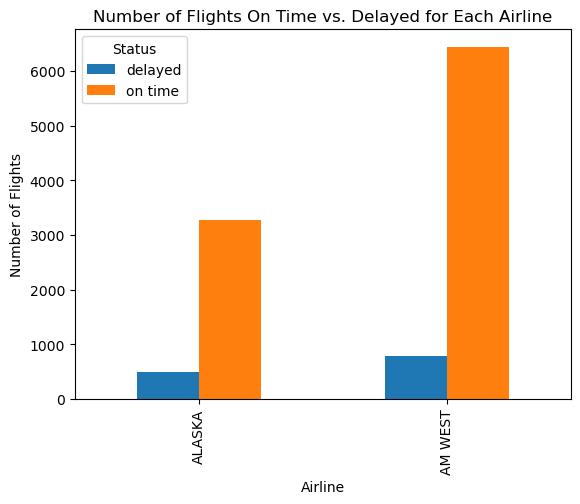

In [6]:
summary.unstack().plot(kind='bar')
plt.title('Number of Flights On Time vs. Delayed for Each Airline')
plt.ylabel('Number of Flights')
plt.show()


In [7]:
delays = data[data['Status'] == 'delayed'].pivot(index='Destination', columns='Airline', values='Flights')
delays


Airline,ALASKA,AM WEST
Destination,,
Los Angeles,62,117
Phoenix,12,415
San Diego,20,65
San Francisco,102,129
Seattle,305,61


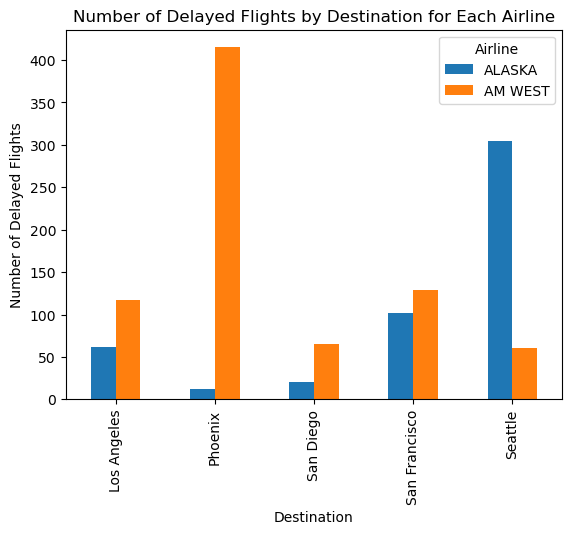

In [8]:
delays.plot(kind='bar')
plt.title('Number of Delayed Flights by Destination for Each Airline')
plt.ylabel('Number of Delayed Flights')
plt.show()


In [9]:
total_flights = data.groupby('Airline').sum()['Flights']
delayed_flights = data[data['Status'] == 'delayed'].groupby('Airline').sum()['Flights']
delay_proportion = (delayed_flights / total_flights) * 100
delay_proportion


Airline
ALASKA     13.271523
AM WEST    10.892734
Name: Flights, dtype: float64

# Delays by Destination
The bar chart showcases the number of delayed flights for each destination by airline. Observations:
- Destination Seattle has the highest delays for ALASKA.
- Destination Phoenix has the highest delays for AM WEST.

This suggests that certain destinations might be more prone to delays for each airline, possibly due to factors like airport congestion, weather conditions, or operational challenges.


# Conclusions
- ALASKA has a delay rate of 13.271523% while AM WEST has a delay rate of 10.892734%.
- Both airlines combined face the most delays in Phoenix.
- However thats due to the overwelming number of delays caused by AM West (415) at that location

Based on the analysis, AM West appears to have better on-time performance across the analyzed destinations. However, both airlines might benefit from further investigating the causes of delays, especially at Phoenix and Seattle, to improve their on-time performance.
